In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [62]:
df=pd.read_csv("Bostonhousing.csv")

In [63]:
data=pd.DataFrame(df)

In [64]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [66]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [67]:
data.shape

(506, 14)

In [68]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [69]:
data.nunique() #Unique values in the dataset

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [70]:
data[data.isnull().any(axis=1)] #Checking rows with missing values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [71]:
corr = data.corr()
corr.shape

(14, 14)

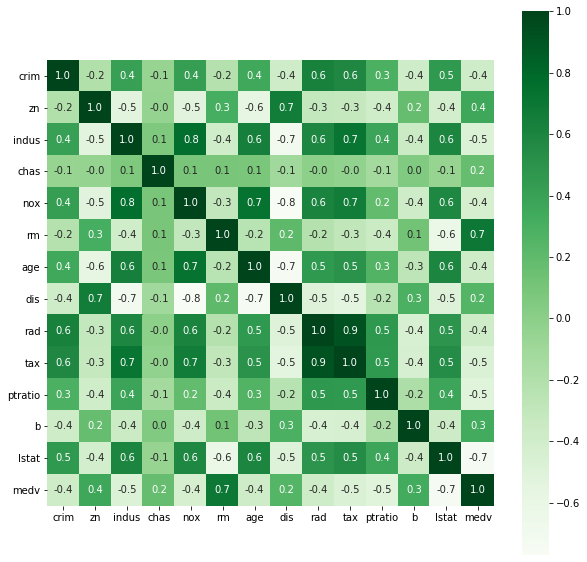

In [72]:
# Plotting the correlation between data
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [73]:
# Spliting target variable and independent variables
X = data.drop(['medv'], axis = 1)
y = data['medv']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [75]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lr = LinearRegression()

# Train the model using the training sets 
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lr.intercept_
#intecept value

36.357041376595404

In [77]:
# Model prediction on train data
y_pred = lr.predict(X_train)

In [87]:
test_predict=lr.predict(X_test)

In [78]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lr.coef_]).T

In [79]:
print(coeffcients)

          0           1
0      crim    -0.12257
1        zn   0.0556777
2     indus -0.00883428
3      chas     4.69345
4       nox    -14.4358
5        rm     3.28008
6       age -0.00344778
7       dis    -1.55214
8       rad     0.32625
9       tax  -0.0140666
10  ptratio   -0.803275
11        b  0.00935369
12    lstat   -0.523478


In [80]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

R^2: 0.7465991966746853
Adjusted R^2: 0.736910342429894


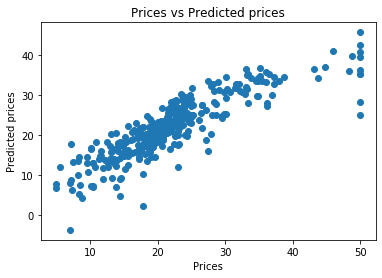

In [81]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [82]:
X_test.shape,y_test.shape

((152, 13), (152,))

In [83]:
X_train.shape,y_train.shape

((354, 13), (354,))

In [84]:
y_pred.shape

(354,)

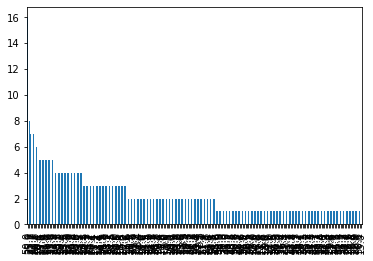

In [85]:
df['medv'].value_counts().plot(kind = 'bar')

In [86]:
print(df.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [88]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
8,16.5,11.073809,5.426191
289,24.8,26.479103,-1.679103
68,17.4,17.344899,0.055101
211,19.3,19.194861,0.105139
226,37.6,36.361707,1.238293


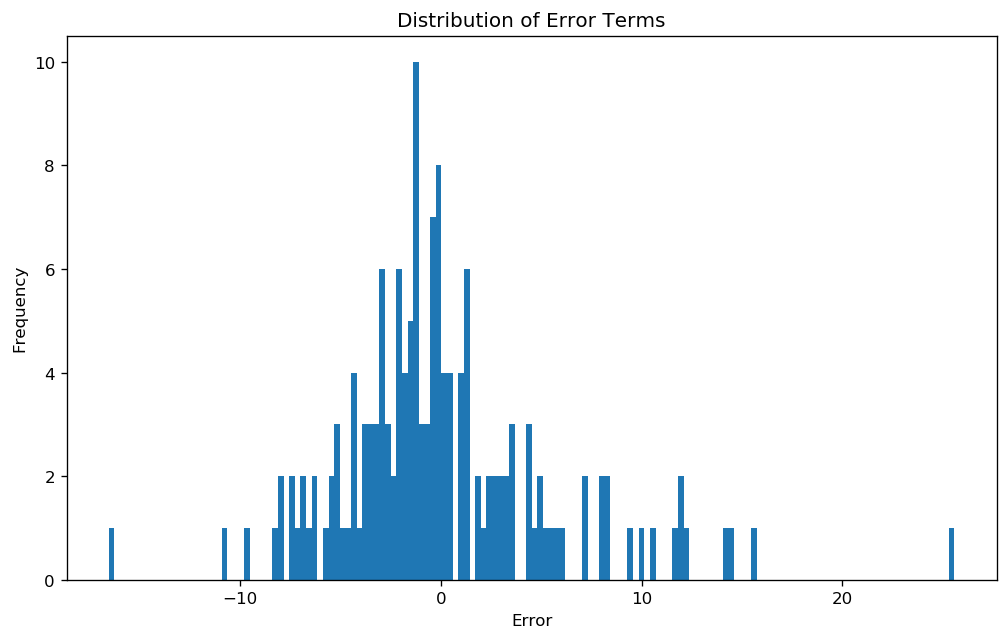

In [90]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

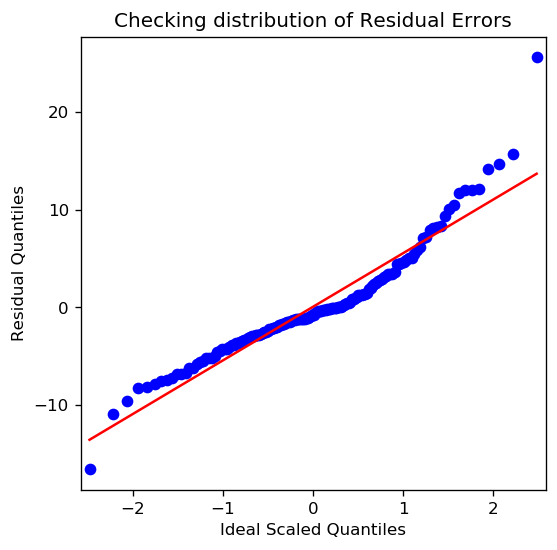

In [91]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()